In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



In [2]:
df1 = pd.read_csv("data/wine_1.csv")
df1.set_index('Bottle', inplace=True)
##print("df1 loaded:", df1.head())

df2 = pd.read_csv("data/wine_2.csv", skiprows=1)
df2.columns = ['Bottle', 'Grape', 'Origin', 'Alcohol', 'pH', 'Colour', 'Aroma']
df2.set_index('Bottle', inplace=True)
#print("\ndf2 loaded:", df2.head())

df3 = pd.read_csv("data/wine_3.csv",nrows=5)
df3.set_index('Bottle', inplace=True)
#print("\ndf3 loaded:", df3.head())

##used claude to help me load text files
df4 = pd.read_csv("data/wine_4.txt", sep='\t')
df4.set_index('Bottle', inplace=True)
#print("\ndf4 loaded:", df4.head())

df5 = pd.read_csv("data/wine_5.csv")
df5 = df5.drop('Add more columns', axis=1)
df5.set_index('Bottle', inplace=True)
#print("\ndf5 loaded:", df5.head())


##used claude AI for this part to fix the txt file
df6 = pd.read_csv("data/wine_6.txt", 
                  sep='\t',           
                  header=1,         
                  nrows=5,
                  skipinitialspace=True)          
df6 = df6[['Bottle', 'Grape', 'Origin', 'Alcohol', 'pH', 'Colour', 'Aroma']]  
df6.set_index('Bottle', inplace=True) 
#print("\ndf6 loaded:", df6.head())

In [3]:
...

Ellipsis

In [4]:

for i, df in enumerate([ df2, df3, df4, df5, df6]):
    assert df1.equals(df), f"df1 not equal to df{i + 2}"
print("All tests passed.")

All tests passed.


In [5]:
titanic_df = pd.read_csv("data/titanic.csv")
#print(titanic_df.info())

In [6]:
assert set(titanic_df.columns) == set(
    [
        "pclass",
        "survived",
        "name",
        "sex",
        "age",
        "sibsp",
        "parch",
        "ticket",
        "fare",
        "cabin",
        "embarked",
        "boat",
        "body",
        "home.dest",
    ]
), "All required columns are not present"
assert len(titanic_df.index) == 1309, "Wrong number of rows in dataframe"
print("Success")

Success


In [7]:
titanic_df = titanic_df.rename(columns={
    'sibsp': 'siblings_spouses',
    'parch': 'parents_children'
})

In [8]:
assert set(["siblings_spouses", "parents_children"]).issubset(
    titanic_df.columns
), "Column names were not changed properly"
print("Success")

Success


In [9]:
age_column = titanic_df['age']
print(type(age_column))

<class 'pandas.core.series.Series'>


In [10]:
age_column = titanic_df[['age']]
print(type(age_column))

<class 'pandas.core.frame.DataFrame'>


In [11]:
multiple_columns = titanic_df[['pclass', 'survived', 'age']]
print(type(multiple_columns))

<class 'pandas.core.frame.DataFrame'>


In [12]:
subset = titanic_df.iloc[0:5, [2, 3, 4]]

In [13]:
subset = titanic_df.loc[0:4, ['name', 'sex', 'age']]

In [14]:
survivors = titanic_df.query('survived == 1')
print(f"Number of survivors: {survivors.shape[0]}")

Number of survivors: 500


In [15]:
elderly_survivors = titanic_df.query('survived == 1 and age > 60')
print(f"Number of survivors over 60: {len(elderly_survivors)}")

Number of survivors over 60: 8


In [16]:
lowest = float(titanic_df['fare'].min())
highest = float(titanic_df['fare'].max())

print(f"Lowest fare: {lowest}")
print(f"Highest fare: {highest}")

Lowest fare: 0.0
Highest fare: 512.3292


In [17]:
sorted_df = titanic_df.sort_values('fare', ascending=False)

In [18]:
sorted_df.to_csv('titanic_fares.csv')

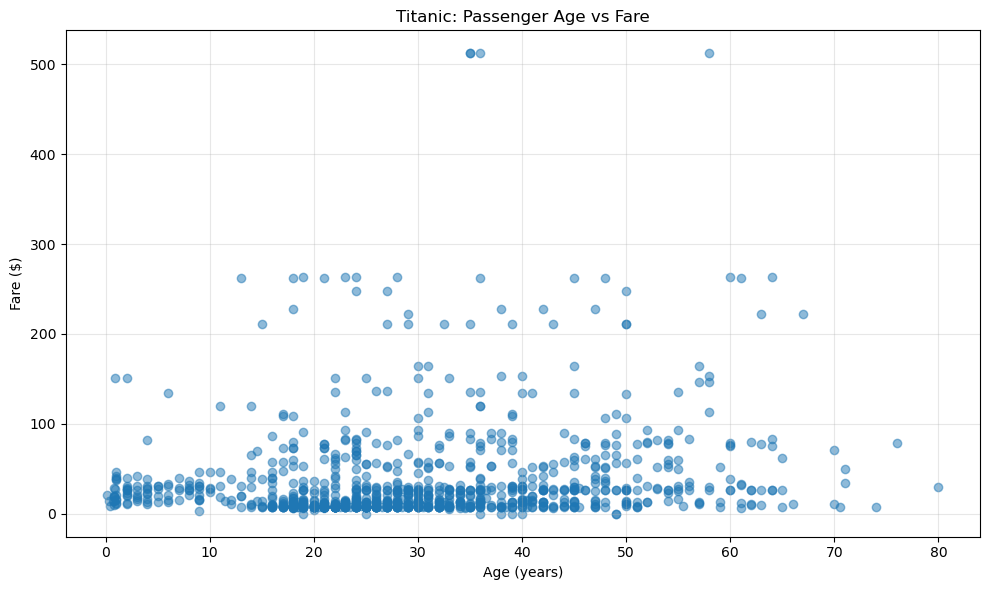

In [19]:
##used help of claude AI here

plt.figure(figsize=(10, 6))  


plt.scatter(titanic_df['age'], titanic_df['fare'], alpha=0.5)


plt.xlabel('Age (years)')
plt.ylabel('Fare ($)')
plt.title('Titanic: Passenger Age vs Fare')

plt.grid(True, alpha=0.3)

plt.tight_layout()

plt.show()

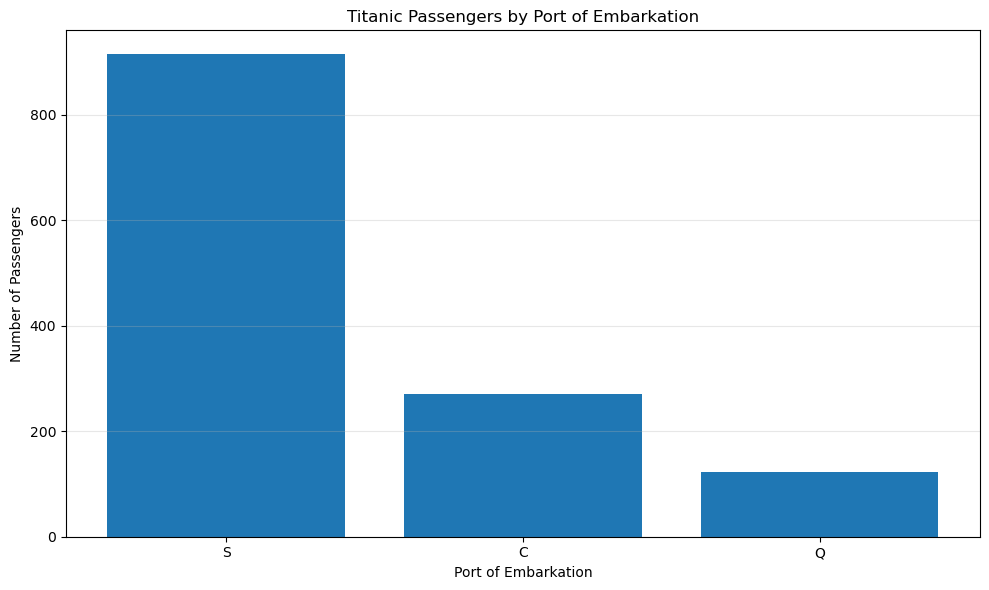

In [20]:

plt.figure(figsize=(10, 6))


embarked_counts = titanic_df['embarked'].value_counts()


plt.bar(embarked_counts.index, embarked_counts.values)

plt.xlabel('Port of Embarkation')
plt.ylabel('Number of Passengers')
plt.title('Titanic Passengers by Port of Embarkation')


plt.grid(True, alpha=0.3, axis='y')


plt.tight_layout()

plt.show()